# **Importing Necessary Libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import matplotlib.image as img
import tensorflow as tf
import os
import random
import cv2
from PIL import Image
from zipfile import ZipFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import SGD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python-headless
!pip install scikit-image
!pip install numpy
!pip install matplotlib

from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.feature import canny

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Zip File**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# specifying the zip file name
zip_path = "/content/drive/My Drive/bone fracture.v2-release.clip.zip"

# opening the zip file in READ mode
with ZipFile(zip_path, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()
	# extracting all the files
	zip.extractall()

File Name                                             Modified             Size
README.dataset.txt                             2023-02-12 04:06:02          702
README.roboflow.txt                            2023-02-12 04:06:02          889
test/                                          2023-02-12 04:06:02            0
test/_tokenization.txt                         2023-02-12 04:06:02          644
test/angle/                                    2023-02-12 04:06:00            0
test/angle line/                               2023-02-12 04:06:00            0
test/angle line/204_jpg.rf.3c47ac3c43fab1b4d62a19ceed8c8231.jpg 2023-02-12 04:06:00        26813
test/angle/10_jpg.rf.d362a00f9a6b4ac31668dc8aae9c71de.jpg 2023-02-12 04:06:00        49518
test/angle/135_jpg.rf.a8cbe93a3de035a4927b20c42604ae4c.jpg 2023-02-12 04:06:00        43496
test/angle/242_jpg.rf.55a6cd9175204fcbc9516c8384ad1770.jpg 2023-02-12 04:06:00        44157
test/angle_multiple/                           2023-02-12 04:06:00  

# **Path to Train,Test,Valid Directory**

In [ ]:
# define the paths to the train, validation, and test directories
train_dir = "/content/train"
valid_dir = "/content/valid"
test_dir = "/content/test"

# **Images from multiple categories**

In [ ]:
!rm /content/train/_tokenization.txt

In [ ]:
!rm /content/test/_tokenization.txt

In [ ]:
!rm /content/valid/_tokenization.txt

In [ ]:
def plot_frac_images(train_dir):
    plt.figure(figsize = (18,13))
    for i, col in enumerate(os.listdir(train_dir)):
        image = random.choice(os.listdir(train_dir + '/' + col))
        image_path = train_dir + '/' + col + '/' + image
        img = mpimg.imread(image_path)/200
       
        plt.subplot(3,5,i+1)
        plt.title(col)
        plt.imshow(img)
        plt.axis(False)
        i = i + 1

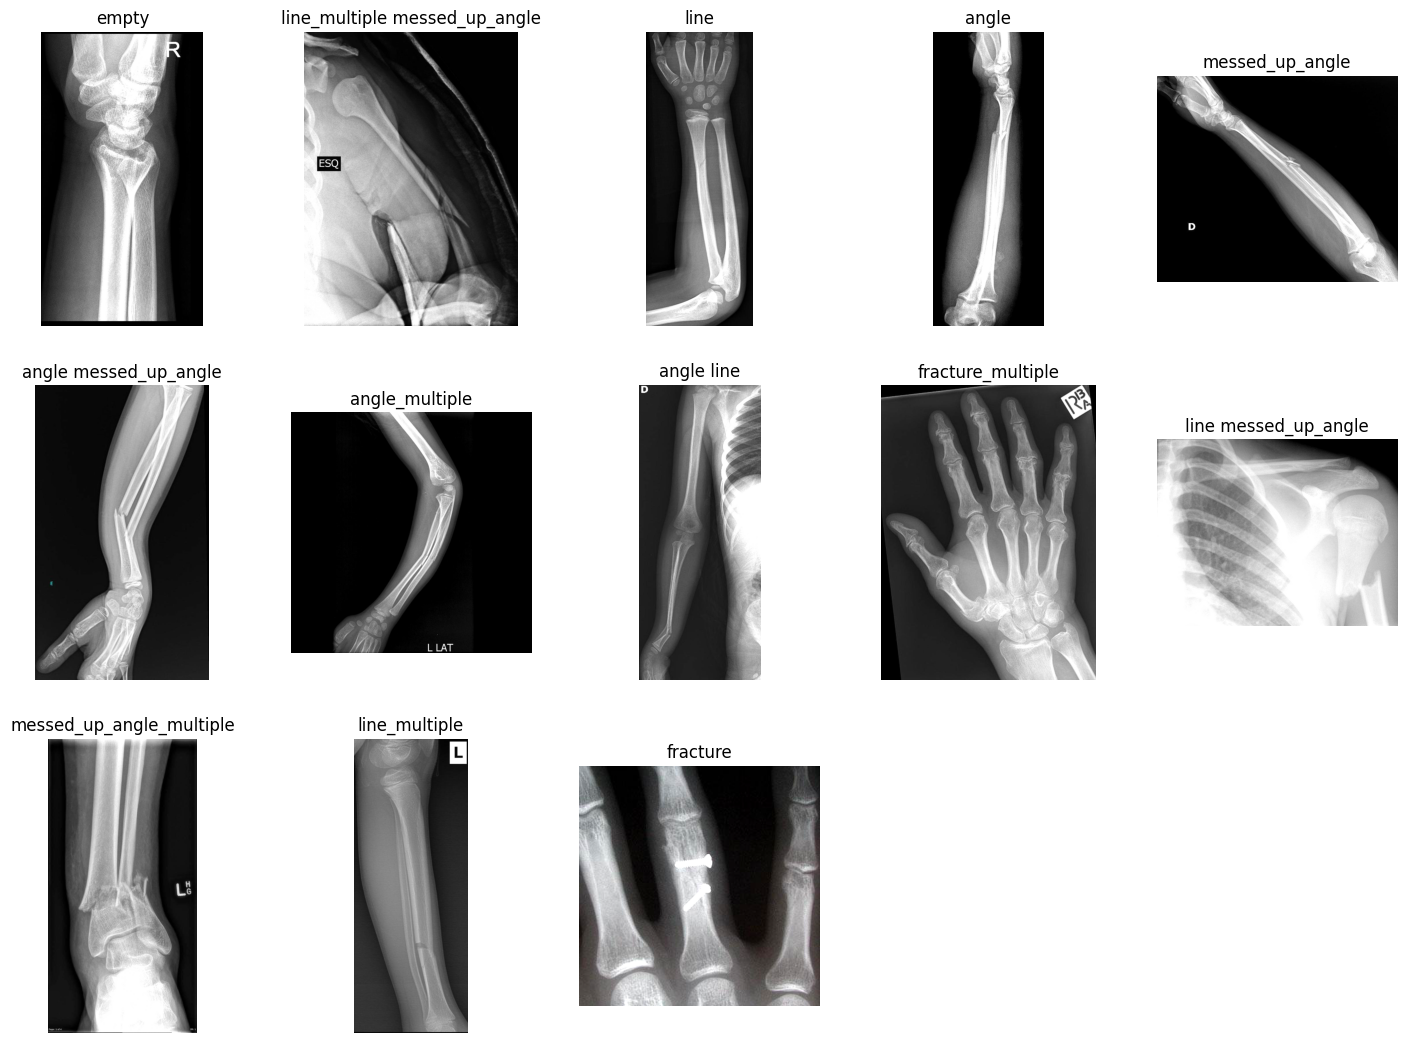

In [ ]:
plot_frac_images(train_dir)

In [ ]:
def plot_frac_images(test_dir):
    plt.figure(figsize = (18,13))
    for i, col in enumerate(os.listdir(test_dir)):
        image = random.choice(os.listdir(test_dir + '/' + col))
        image_path = test_dir + '/' + col + '/' + image
        img = mpimg.imread(image_path)/200
       
        plt.subplot(3,5,i+1)
        plt.title(col)
        plt.imshow(img)
        plt.axis(False)
        i = i + 1

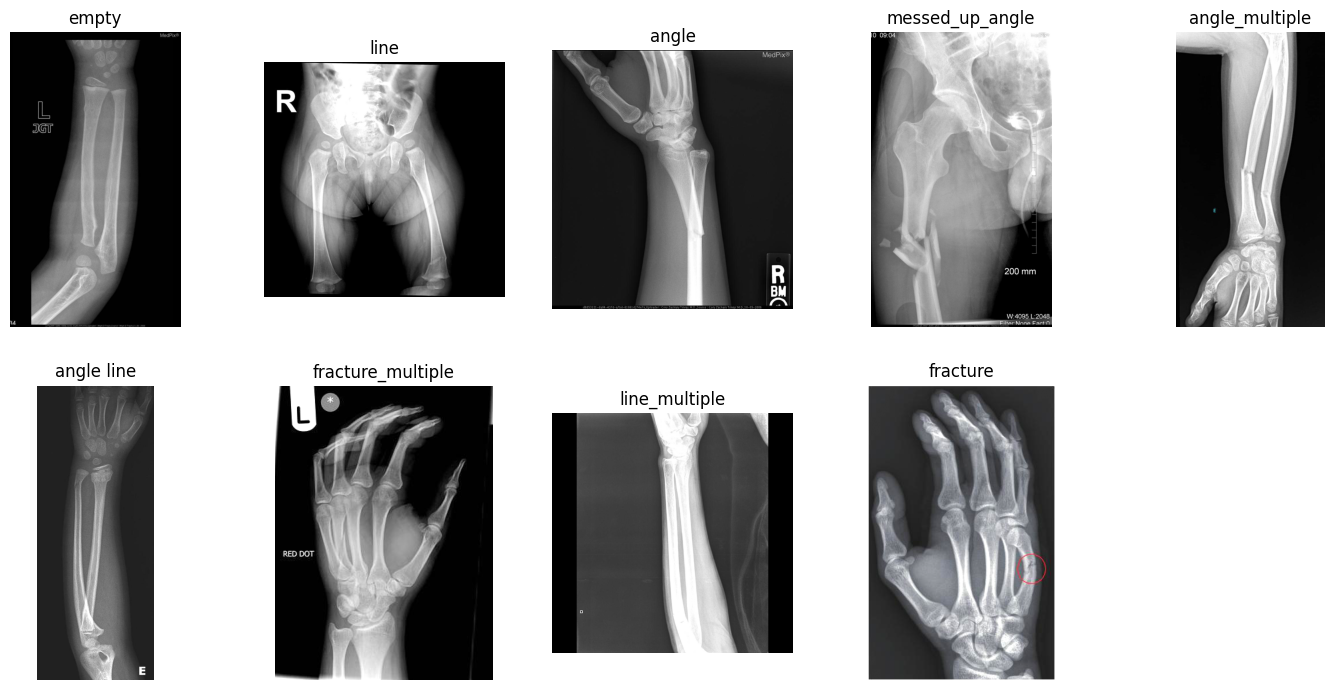

In [ ]:
plot_frac_images(test_dir)

In [ ]:
def plot_frac_images(valid_dir):
    plt.figure(figsize = (18,13))
    for i, col in enumerate(os.listdir(valid_dir)):
        image = random.choice(os.listdir(valid_dir + '/' + col))
        image_path = valid_dir + '/' + col + '/' + image
        img = mpimg.imread(image_path)/200
       
        plt.subplot(3,5,i+1)
        plt.title(col)
        plt.imshow(img)
        plt.axis(False)
        i = i + 1

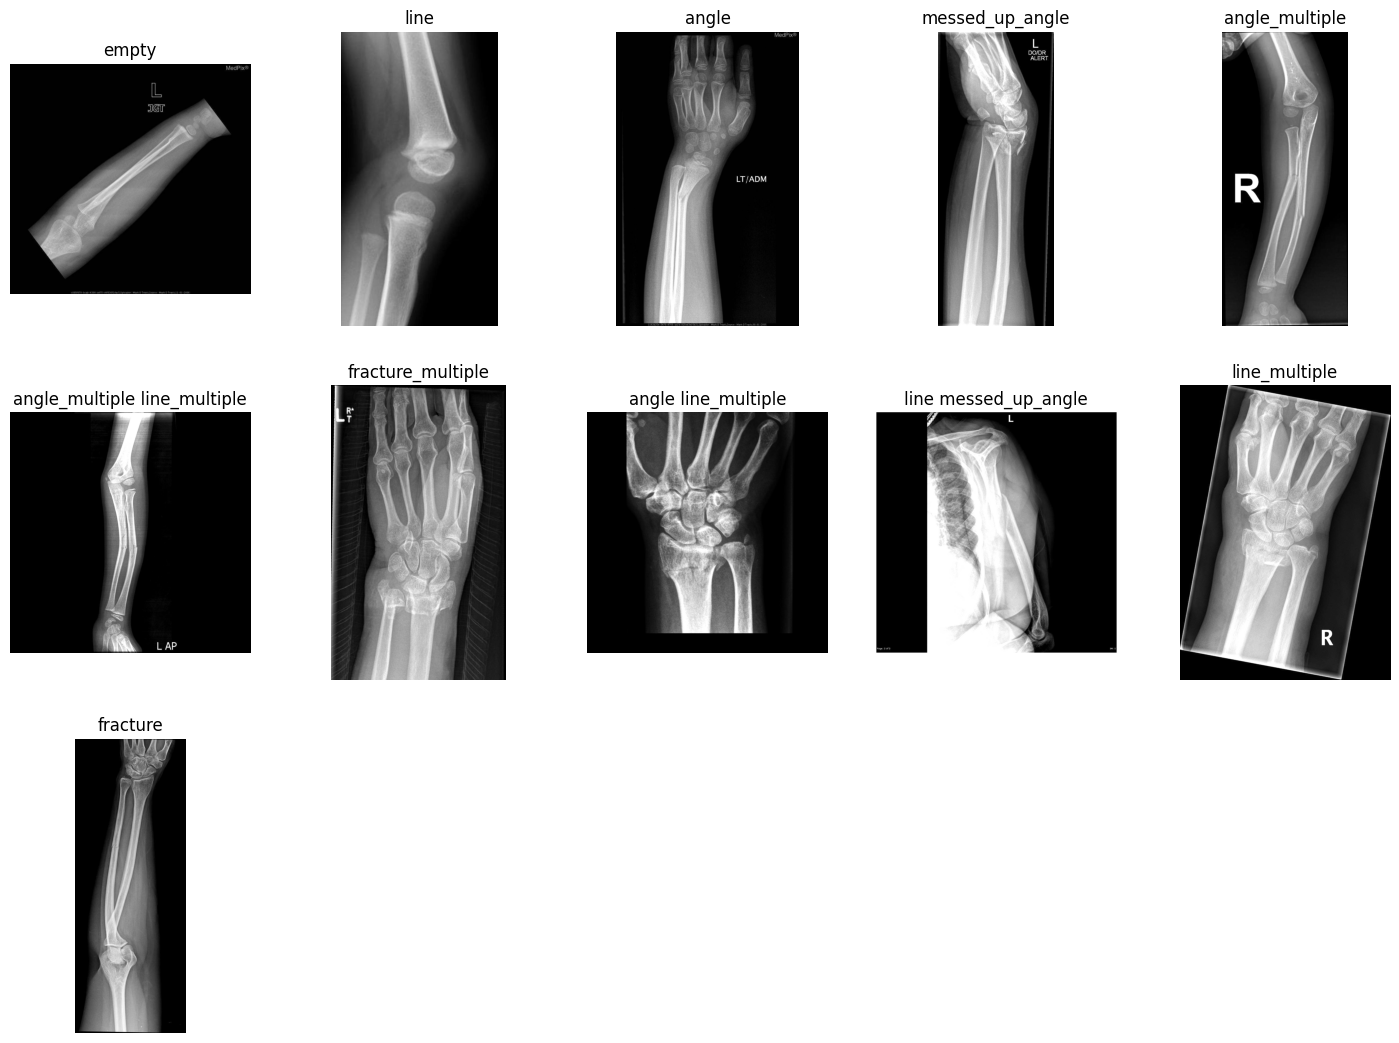

In [ ]:
plot_frac_images(valid_dir)

# **PRE PROCESSING**

# **Resize Images**

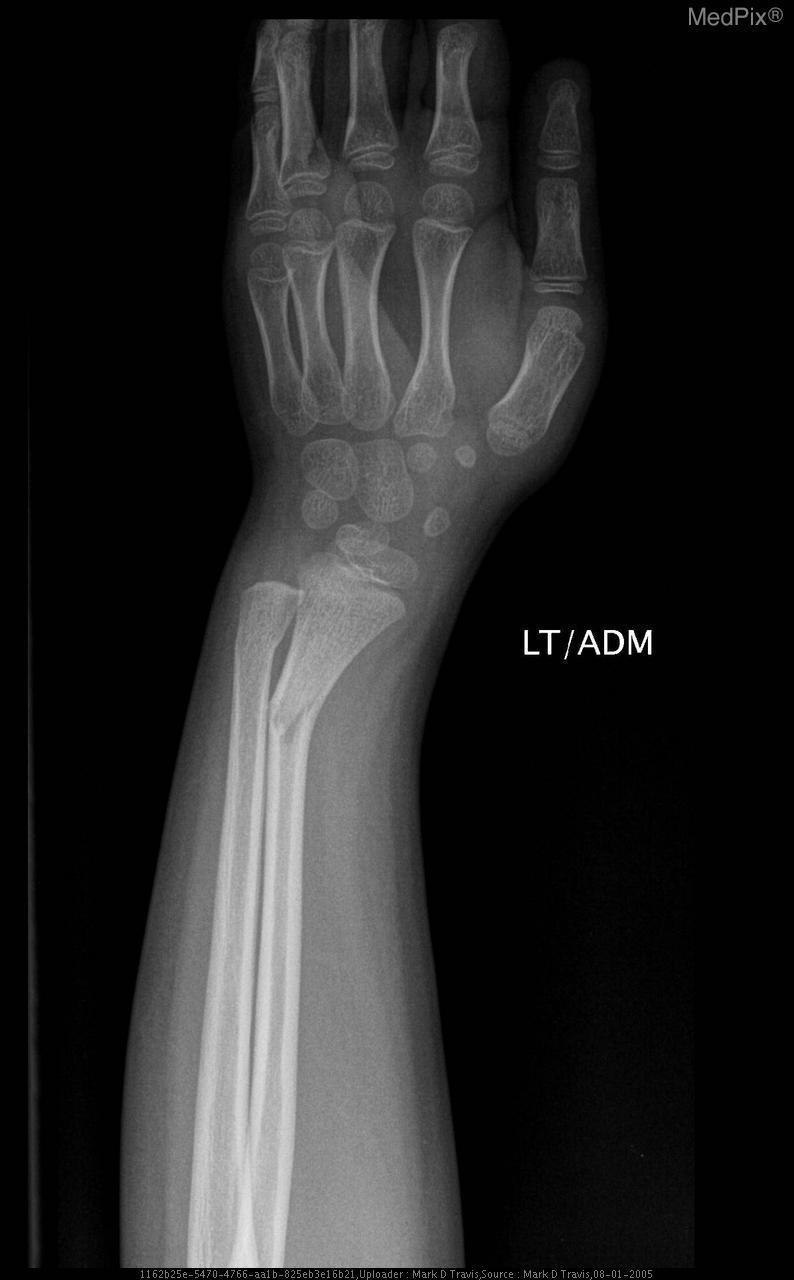

The size of the image is: (794, 1280)


In [ ]:
from PIL import Image

# Path to an image in the extracted dataset
image_path = '/content/valid/angle/129_jpg.rf.29abf0d991fb965243fd5cd7823cd796.jpg'

# Load the image and display it
image = Image.open(image_path)
image.show()
image_size = image.size
print(f"The size of the image is: {image_size}")

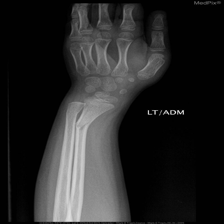

In [ ]:
# Define the desired output size
output_size = (224, 224)

# Resize the image
resized_image = image.resize(output_size)

# Display the resized image
resized_image.show()

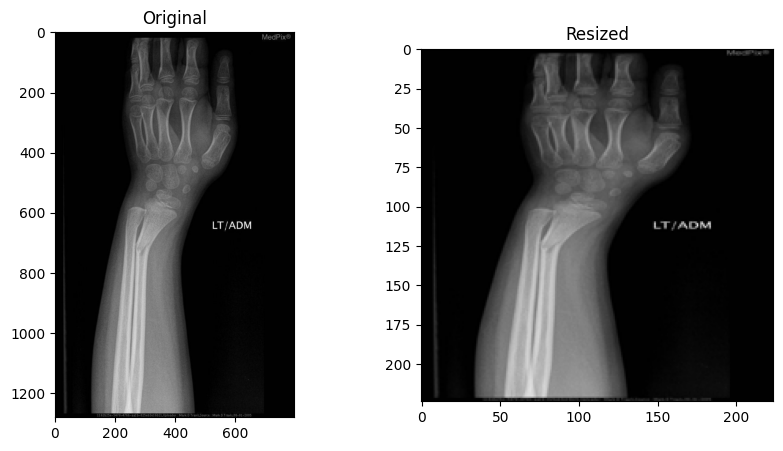

In [ ]:
# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original')
axs[1].imshow(resized_image)
axs[1].set_title('Resized')
plt.show()

# **IMAGE FORMAT**

In [ ]:
# specify the path to the image file
image_path = "/content/train/angle/101_jpg.rf.01df1023e27cc86113edc3d17e5d9849.jpg"

# load the image with Pillow
image = Image.open(image_path)

# print the mode attribute
print(image.mode)

RGB


In [ ]:
def load_and_convert_images(directory):
    images = []
    labels = []
    loaded_categories = []
    for category in os.listdir(directory):
        if category in loaded_categories:
            continue
        loaded_categories.append(category)
        category_dir = os.path.join(directory, category)
        image_filename = os.listdir(category_dir)[0]
        image_path = os.path.join(category_dir, image_filename)
        # Load image as RGB
        rgb_image = cv2.imread(image_path)
        # Convert to grayscale
        grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
        # Add to list of images and labels
        images.append(grayscale_image)
        labels.append(category)
    return images, labels

In [ ]:
def plot_images(images, labels, title):
    displayed_categories = {}
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=15)
    for i in range(len(images)):
        category = labels[i]
        if category not in displayed_categories:
            displayed_categories[category] = True
            plt.subplot(5,3,len(displayed_categories))
            plt.imshow(images[i], cmap='gray')
            plt.title(category)
            plt.xticks([])
            plt.yticks([])
            if len(displayed_categories) == 25:
                break
    plt.show()

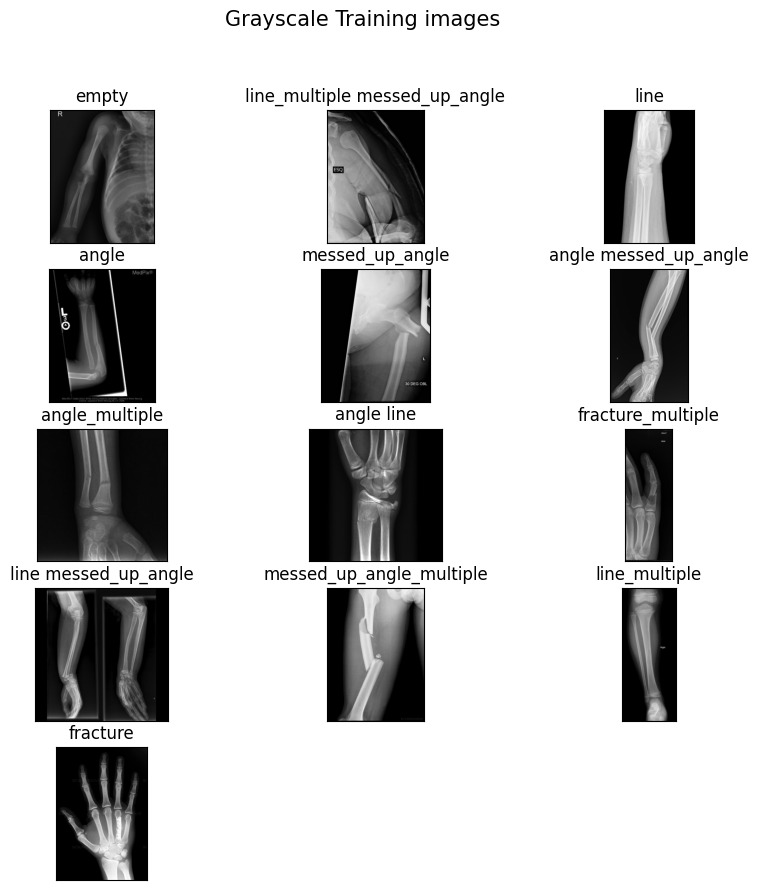

In [ ]:
# Load images from train directory
train_images, train_labels = load_and_convert_images(train_dir)

# Plot the first 25 images
plot_images(train_images[:25], train_labels[:25], 'Grayscale Training images')

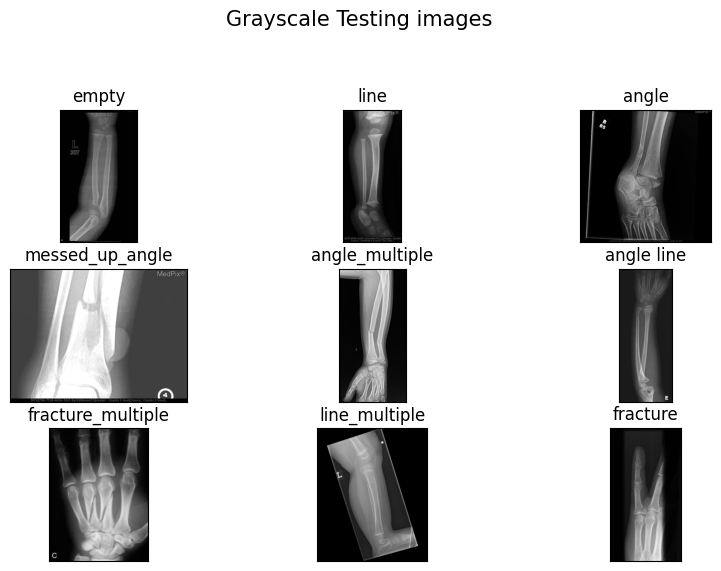

In [ ]:
# Load images from train directory
test_images, test_labels = load_and_convert_images(test_dir)

# Plot the first 25 images
plot_images(test_images[:25], test_labels[:25], 'Grayscale Testing images')

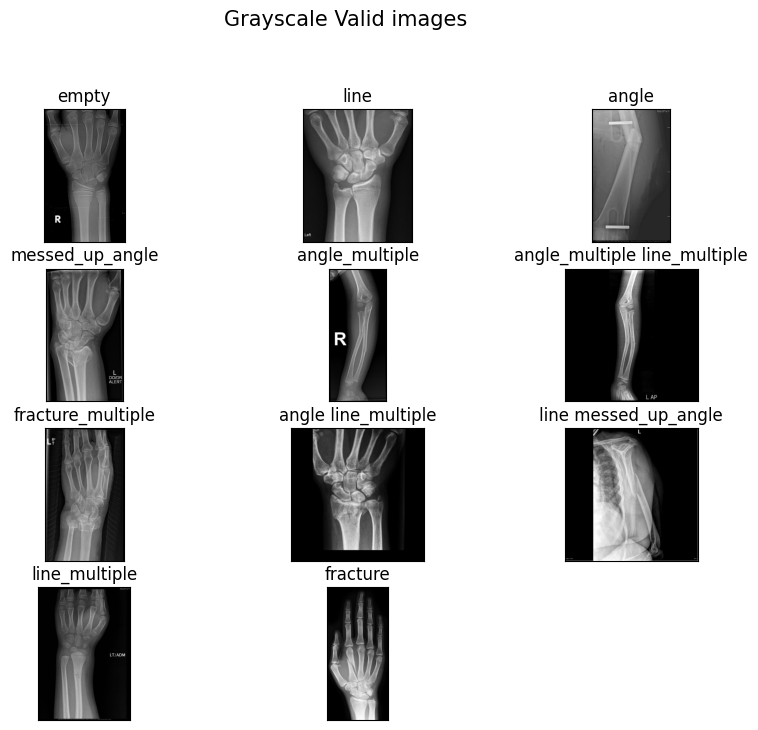

In [ ]:

# Load images from train directory
valid_images, valid_labels = load_and_convert_images(valid_dir)

# Plot the first 25 images
plot_images(valid_images[:25], valid_labels[:25], 'Grayscale Valid images')

# **Image Smoothing**

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        for filename in os.listdir(category_dir):
            image_path = os.path.join(category_dir, filename)
            # Load image as RGB
            rgb_image = cv2.imread(image_path)
            # Add to list of images and labels
            images.append(rgb_image)
            labels.append(category)
    return images, labels

In [ ]:
# Load images from train test valid directory
train_images, train_labels = load_images(train_dir)
test_images, test_labels = load_images(test_dir)
valid_images, valid_labels = load_images(valid_dir)

In [ ]:
def plot_images(images, labels, title):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    for i in range(len(images)):
        plt.subplot(4,4,i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.xticks([])
        plt.yticks([])
        if i==15:
          break
    plt.show()

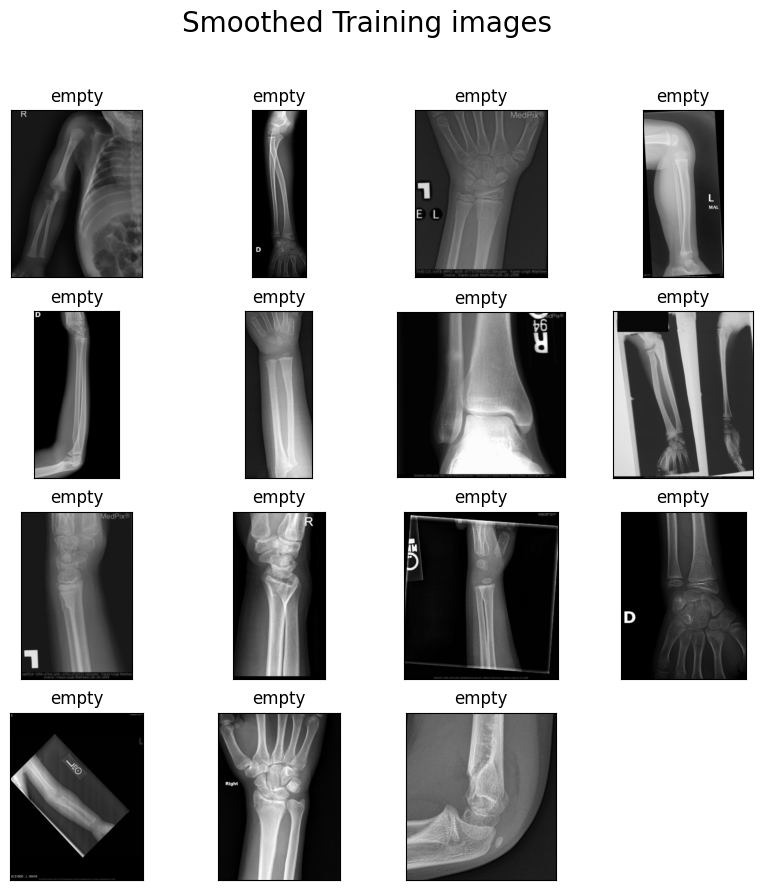

In [ ]:
# Smooth the images
smoothed_images = []
for i,image in enumerate(train_images):
    # Smooth the image
    smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)
    smoothed_images.append(smoothed_image)
    if i==14:
      break

# Plot the smoothed images
plot_images(smoothed_images, train_labels, 'Smoothed Training images')

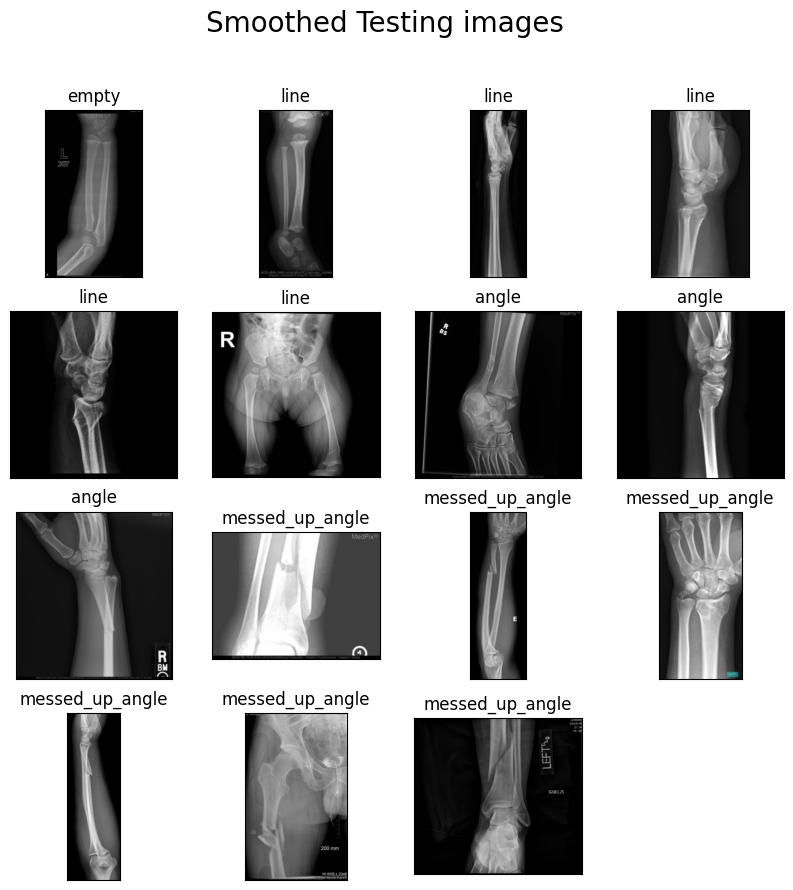

In [ ]:
# Smooth the images
smoothed_timages = []
for i,image in enumerate(test_images):
    # Smooth the image
    smoothed_timage = cv2.GaussianBlur(image, (5, 5), 0)
    smoothed_timages.append(smoothed_timage)
    if i==14:
      break

# Plot the smoothed images
plot_images(smoothed_timages, test_labels, 'Smoothed Testing images')

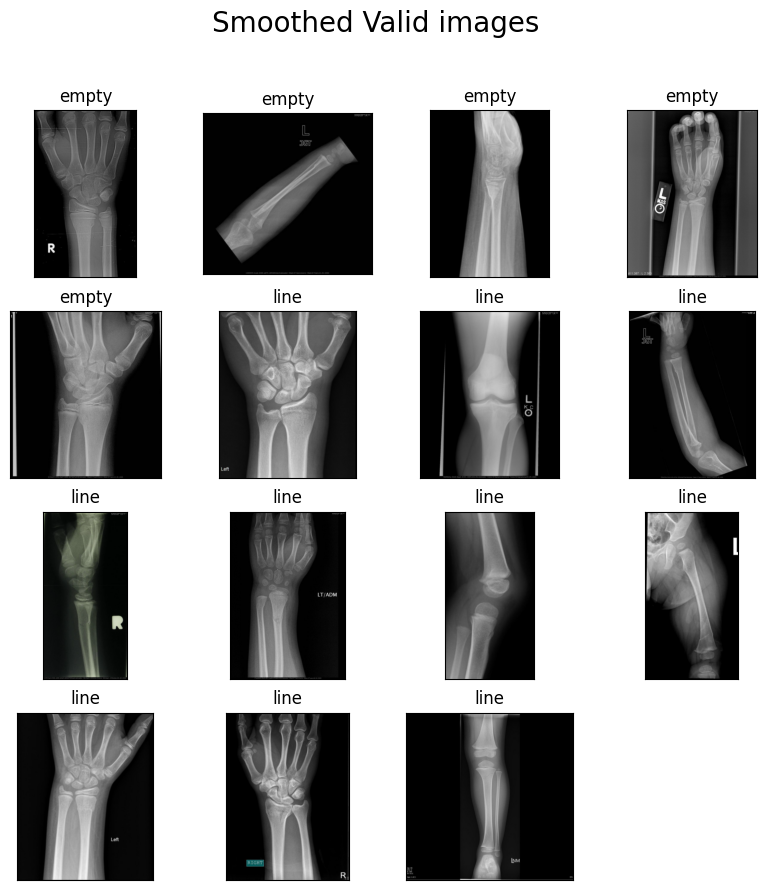

In [ ]:
# Smooth the images
smoothed_vimages = []
for i,image in enumerate(valid_images):
    # Smooth the image
    smoothed_vimage = cv2.GaussianBlur(image, (5, 5), 0)
    smoothed_vimages.append(smoothed_vimage)
    if i==14:
      break

# Plot the smoothed images
plot_images(smoothed_vimages, valid_labels, 'Smoothed Valid images')

# **Image Denoising**

In [ ]:
def load_one_image_per_category(directory):
    images = []
    labels = []
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        for filename in os.listdir(category_dir):
            image_path = os.path.join(category_dir, filename)
            # Load image as RGB
            rgb_image = cv2.imread(image_path)
            # Add to list of images and labels if this is the first image for this category
            if category not in labels:
                images.append(rgb_image)
                labels.append(category)
                break
    return images, labels

In [ ]:
# Load images from train test valid directory
train_images, train_labels = load_one_image_per_category(train_dir)
test_images, test_labels = load_one_image_per_category(test_dir)
valid_images, valid_labels = load_one_image_per_category(valid_dir)

In [ ]:
def plot_images(images, labels, title):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    for i in range(len(images)):
        plt.subplot(5,3,i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

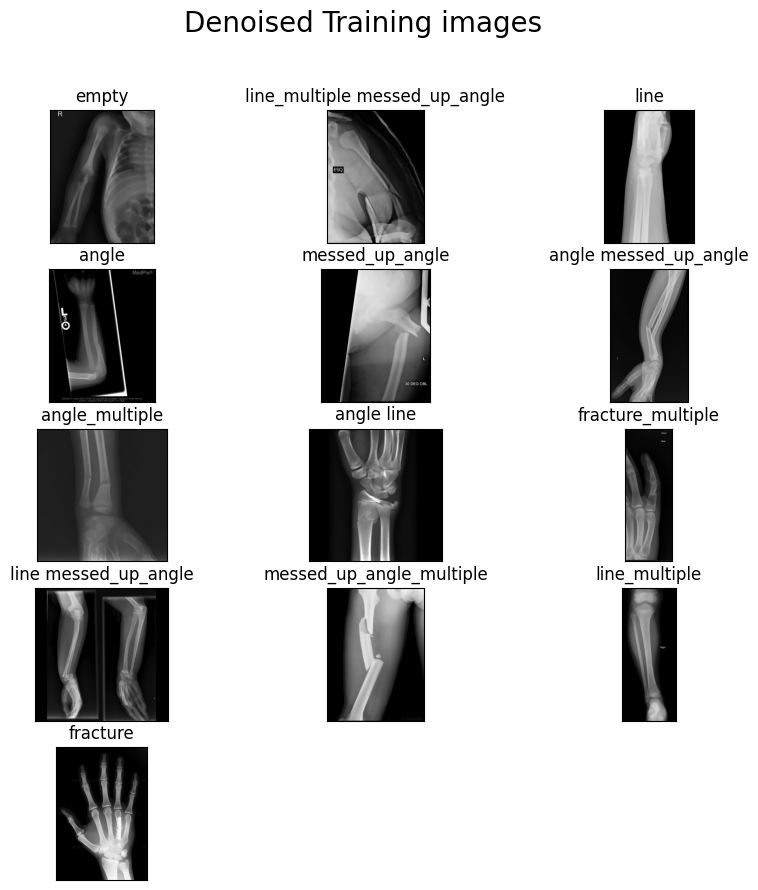

In [ ]:
# Denoise the images
denoised_images = []
for image in train_images:
    # Denoise the image
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    denoised_images.append(denoised_image)

# Plot the denoised images
plot_images(denoised_images, train_labels, 'Denoised Training images')

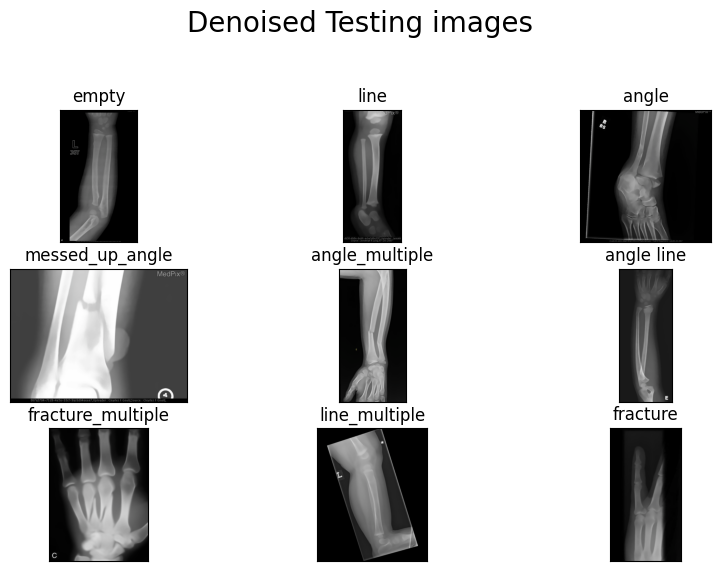

In [ ]:
# Denoise the images
denoised_timages = []
for image in test_images:
    # Denoise the image
    denoised_timage = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    denoised_timages.append(denoised_timage)

# Plot the denoised images
plot_images(denoised_timages, test_labels, 'Denoised Testing images')

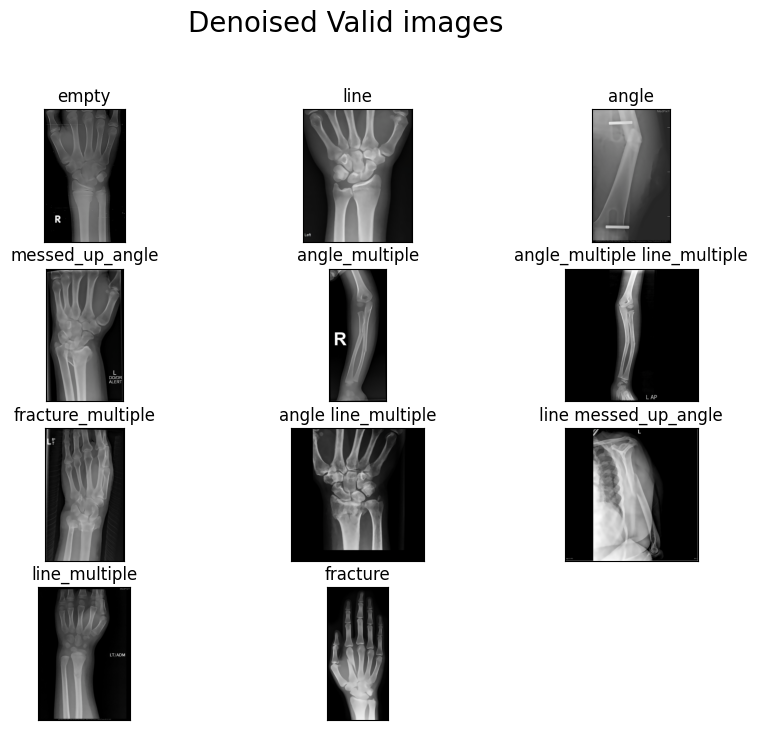

In [ ]:
# Denoise the images
denoised_vimages = []
for image in valid_images:
    # Denoise the image
    denoised_vimage = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    denoised_vimages.append(denoised_vimage)

# Plot the denoised images
plot_images(denoised_vimages, valid_labels, 'Denoised Valid images')

# **Image Segmentation**

# **Entropy Method**

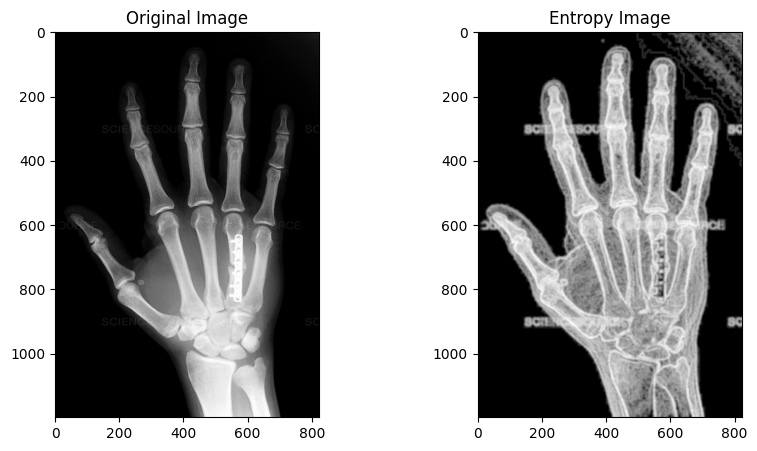

In [ ]:
categories = os.listdir(train_dir)
for category in categories:
    category_folder = os.path.join(train_dir, category)
    image_name = os.listdir(category_folder)[0] # select the first image
    image_path = os.path.join(category_folder, image_name)
    image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

entropy_image = entropy(gray_image, disk(5))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(entropy_image, cmap='gray')
ax[1].set_title('Entropy Image')
plt.show()

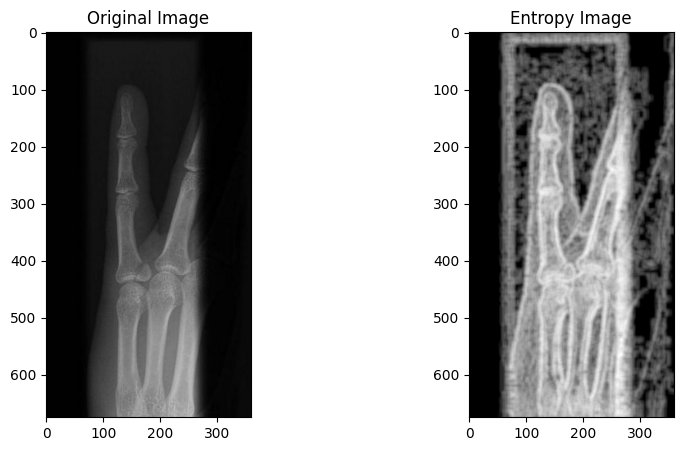

In [ ]:
categories = os.listdir(test_dir)
for category in categories:
    category_folder = os.path.join(test_dir, category)
    image_namet = os.listdir(category_folder)[0] # select the first image
    image_patht = os.path.join(category_folder, image_namet)
    imaget = cv2.imread(image_patht)

gray_imaget = cv2.cvtColor(imaget, cv2.COLOR_BGR2GRAY)

entropy_imaget = entropy(gray_imaget, disk(5))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(imaget)
ax[0].set_title('Original Image')
ax[1].imshow(entropy_imaget, cmap='gray')
ax[1].set_title('Entropy Image')
plt.show()

# **Edge Detection method**

In [ ]:
# define a function to perform Laplacian edge detection on an image
def laplacian_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    return laplacian

In [ ]:
# define a function to perform Prewitt edge detection on an image
def prewitt_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(gray, -1, kernelx)
    img_prewitty = cv2.filter2D(gray, -1, kernely)
    prewitt = cv2.addWeighted(img_prewittx, 0.5, img_prewitty, 0.5, 0)
    return prewitt

In [ ]:
# define a function to perform Sobel edge detection on an image
def sobel_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
    return sobel

In [ ]:
# define a function to perform Canny edge detection on an image
def canny_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 100, 200)
    return canny

In [ ]:
# Define the categories to classify
categories = ['angle', 'line', 'messed_up_angle']

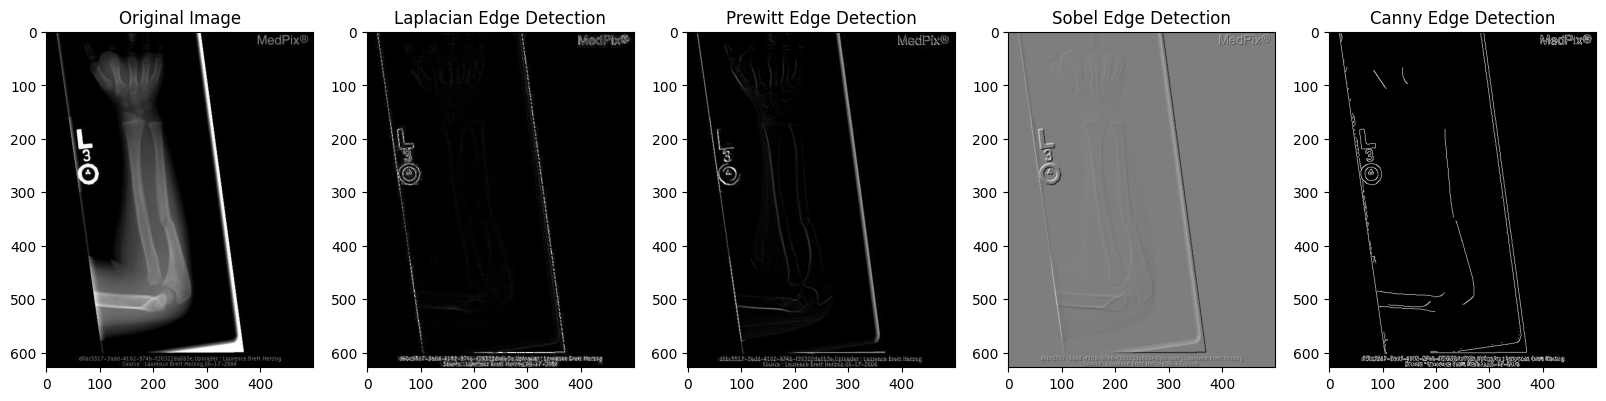

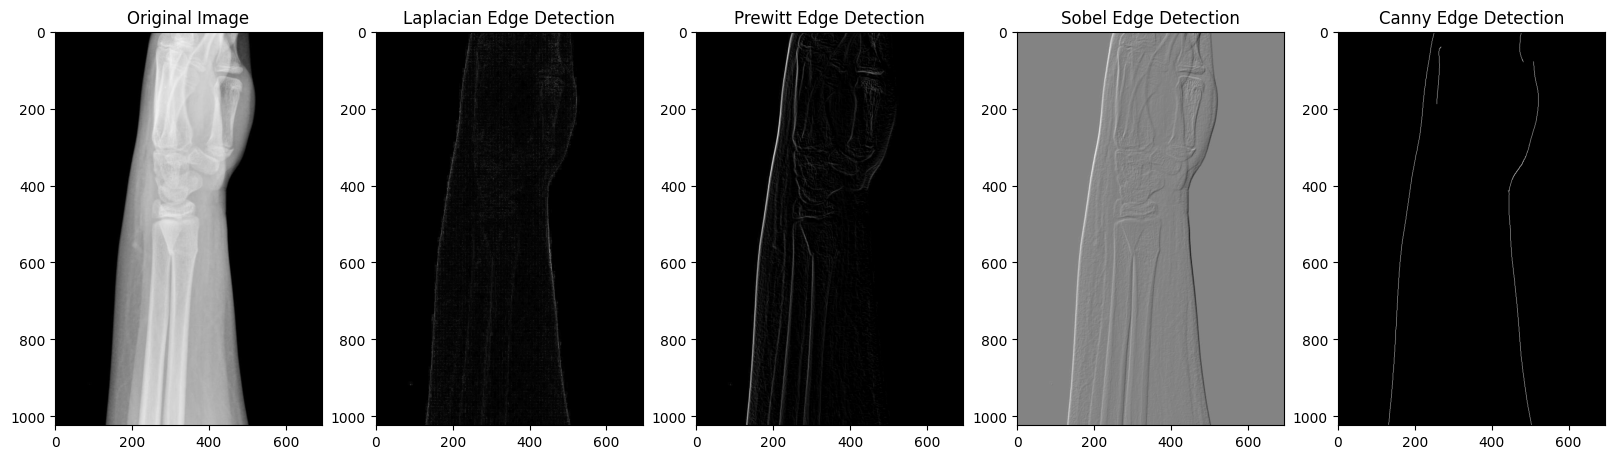

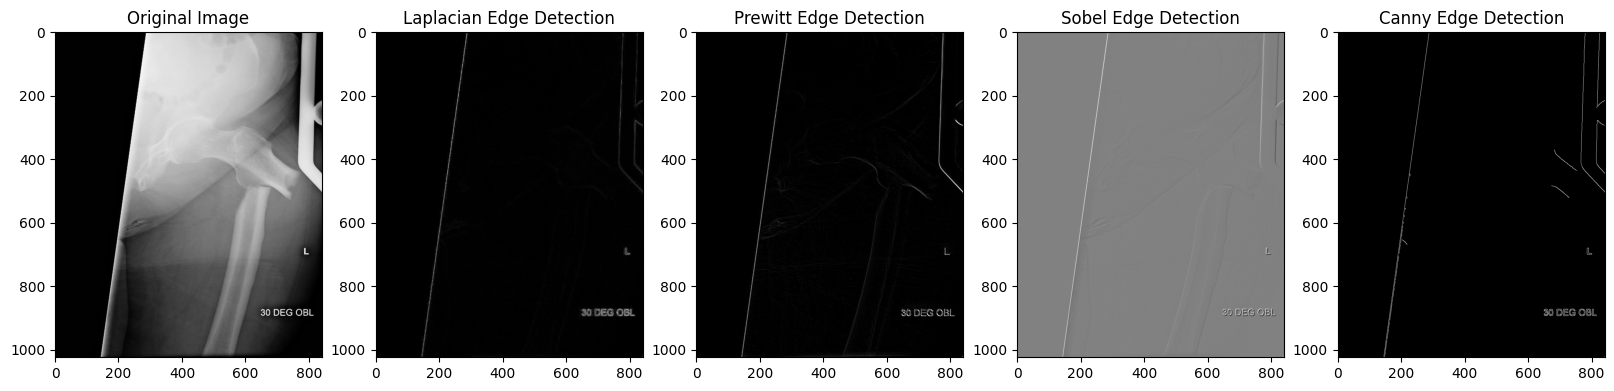

In [ ]:
# loop through each image category in the training set
for category in categories:
    category_path = os.path.join(train_dir, category)
    displayed = False  # flag variable to track if an image has been displayed
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path)
        laplacian = laplacian_edge_detection(img)
        prewitt = prewitt_edge_detection(img)
        sobel = sobel_edge_detection(img)
        canny = canny_edge_detection(img)
        
        # display the original and segmented images using matplotlib
        fig, axs = plt.subplots(1, 5, figsize=(20, 20))
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Original Image')
        axs[1].imshow(laplacian, cmap='gray')
        axs[1].set_title('Laplacian Edge Detection')
        axs[2].imshow(prewitt, cmap='gray')
        axs[2].set_title('Prewitt Edge Detection')
        axs[3].imshow(sobel, cmap='gray')
        axs[3].set_title('Sobel Edge Detection')
        axs[4].imshow(canny, cmap='gray')
        axs[4].set_title('Canny Edge Detection')
        plt.show()
        
        break

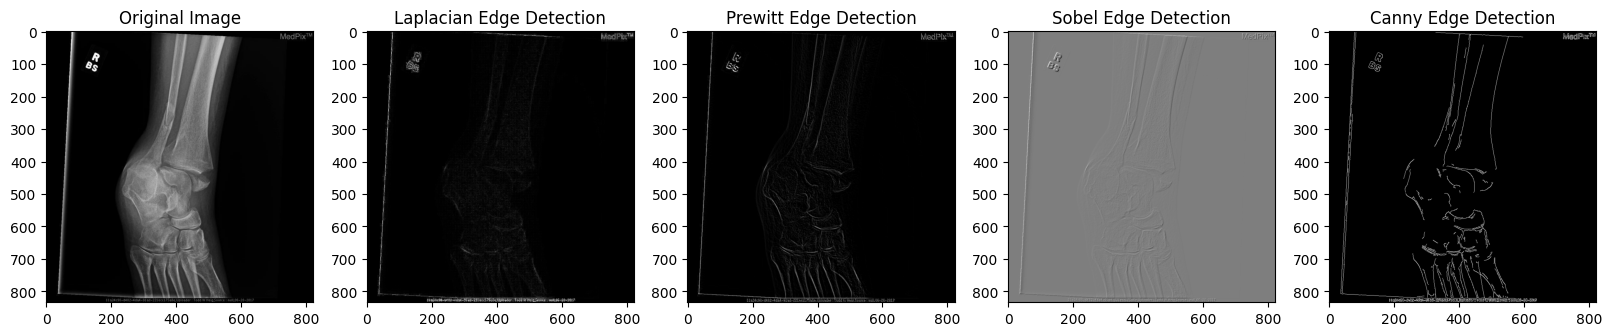

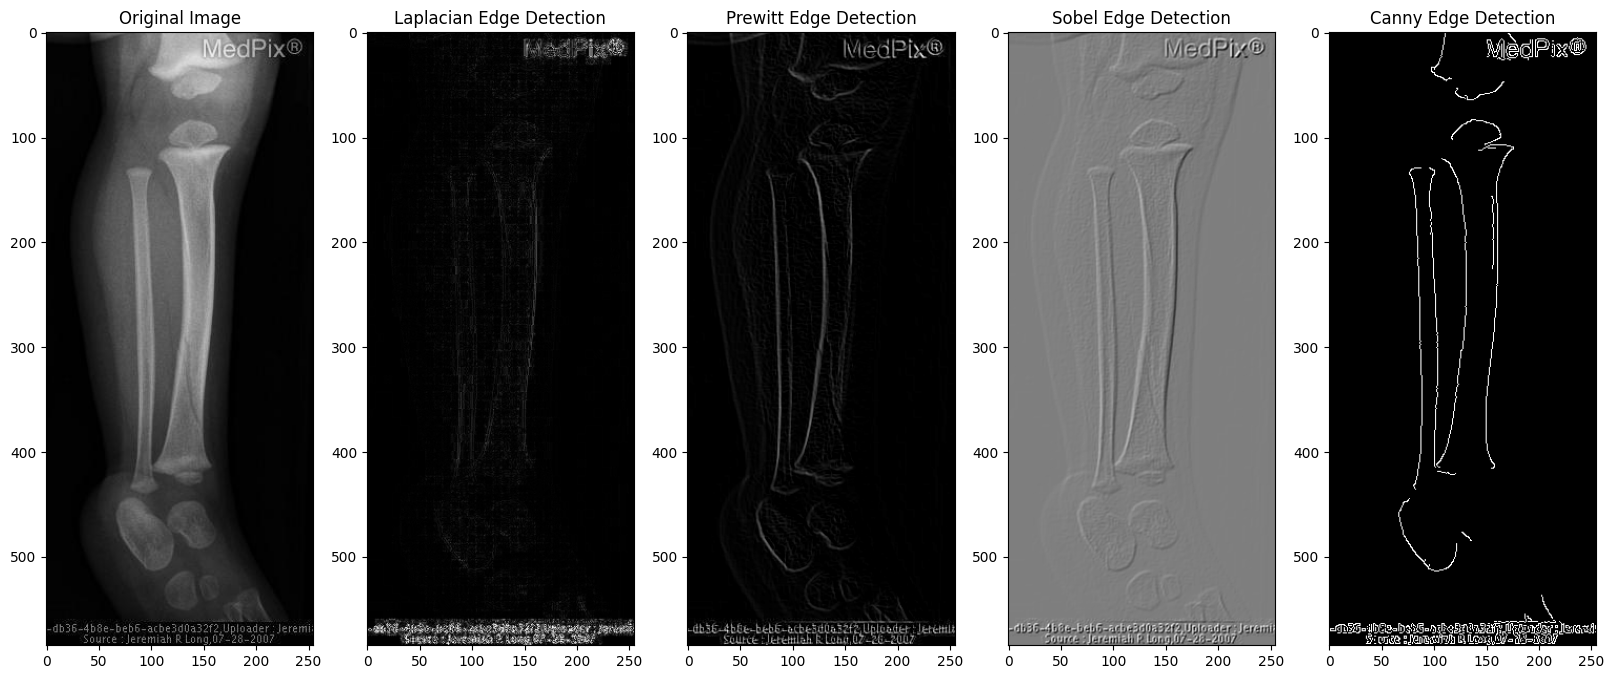

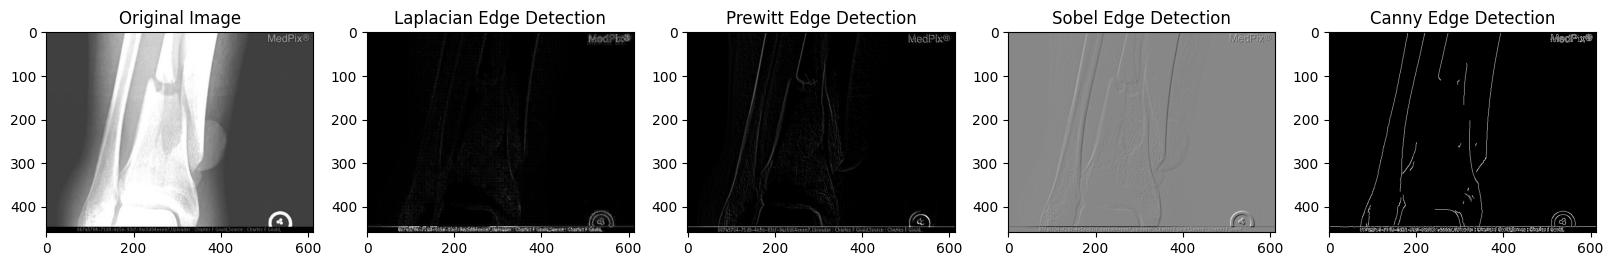

In [ ]:
# loop through each image category in the training set
for category in categories:
    category_path = os.path.join(test_dir, category)
    displayed = False  # flag variable to track if an image has been displayed
    for img_file in os.listdir(category_path):
        img_patht = os.path.join(category_path, img_file)
        imgt = cv2.imread(img_patht)
        laplacian_test = laplacian_edge_detection(imgt)
        prewitt_test = prewitt_edge_detection(imgt)
        sobel_test = sobel_edge_detection(imgt)
        canny_test = canny_edge_detection(imgt)
        
        # display the original and segmented images using matplotlib
        fig, axs = plt.subplots(1, 5, figsize=(20, 20))
        axs[0].imshow(cv2.cvtColor(imgt, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Original Image')
        axs[1].imshow(laplacian_test, cmap='gray')
        axs[1].set_title('Laplacian Edge Detection')
        axs[2].imshow(prewitt_test, cmap='gray')
        axs[2].set_title('Prewitt Edge Detection')
        axs[3].imshow(sobel_test, cmap='gray')
        axs[3].set_title('Sobel Edge Detection')
        axs[4].imshow(canny_test, cmap='gray')
        axs[4].set_title('Canny Edge Detection')
        plt.show()
        
        break

# **Feature Extraction**

In [ ]:
# Define the augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Define the batch size and image dimensions
batch_size = 32
img_width, img_height = 224, 224

In [ ]:
# Define the generators for the train, validation, and test sets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 326 images belonging to 13 classes.
Found 88 images belonging to 11 classes.
Found 44 images belonging to 9 classes.


In [ ]:
# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last 4
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Extract features using the trained model
train_features = model.predict_generator(train_generator, steps=len(train_generator))
val_features = model.predict_generator(validation_generator, steps=len(validation_generator))
test_features = model.predict_generator(test_generator, steps=len(test_generator))

# Flatten the features
train_features_flatten = np.reshape(train_features, (train_features.shape[0], -1))
val_features_flatten = np.reshape(val_features, (val_features.shape[0], -1))
test_features_flatten = np.reshape(test_features, (test_features.shape[0], -1))

# Get the labels
train_labels = train_generator.classes
val_labels = validation_generator.classes
test_labels = test_generator.classes

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-49-d865b16f7a60>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/20
11/11 [==============================] - 338s 31s/step - loss: 0.3621 - accuracy: 0.9231 - val_loss: 0.3418 - val_accuracy: 0.9091
Epoch 2/20
11/11 [==============================] - 369s 34s/step - loss: 0.2981 - accuracy: 0.9231 - val_loss: 0.3139 - val_accuracy: 0.9091
Epoch 3/20
11/11 [==============================] - 326s 30s/step - loss: 0.2784 - accuracy: 0.9231 - val_loss: 0.3212 - val_accuracy: 0.9091
Epoch 4/20
11/11 [==============================] - 345s 32s/step - loss: 0.2749 - accuracy: 0.9231 - val_loss: 0.3065 - val_accuracy: 0.9091
Epoch 5/20
11/11 [==============================] - 346s 32s/step - loss: 0.2723 - accuracy: 0.9231 - val_loss: 0.3053 - val_accuracy: 0.9091
Epoch 6/20
11/11 [==============================] - 346s 32s/step - loss: 0.2721 - accuracy: 0.9231 - val_loss: 0.3070 - val_accuracy: 0.9091
Epoch 7/20
11/11 [==============================] - 345s 32s/step - loss: 0.2719 - accuracy: 0.9231 - val_loss: 0.3072 - val_accuracy: 0.9091
Epoch 

# **MODEL CLASSIFICATION**

In [ ]:
# Load the data into memory
def load_data(path):
    data = []
    labels = []
    for category in categories:
        folder_path = os.path.join(path, category)
        for img in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img)
            img_data = cv2.imread(img_path)
            img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
            img_data = cv2.resize(img_data, (150, 150))
            data.append(img_data)
            labels.append(category)
    return np.array(data), np.array(labels)

In [ ]:
categories = ['line','angle','messed_up_angle']

In [ ]:
# Load the train, test, and validation sets
train_datas, train_labels = load_data(train_dir)
test_datas, test_labels = load_data(test_dir)
valid_datas, valid_labels = load_data(valid_dir)

In [ ]:
# Flatten the data for use with SVM
train_datas = train_datas.reshape(train_datas.shape[0], -1)
test_datas = test_datas.reshape(test_datas.shape[0], -1)
valid_datas = valid_datas.reshape(valid_datas.shape[0], -1)

In [ ]:
# Scale the data to be between 0 and 1
train_datas = train_datas.astype('float32') / 255
test_datas = test_datas.astype('float32') / 255
valid_datas = valid_datas.astype('float32') / 255

# ***1. SVM***

In [ ]:
# Define the SVM model and parameter grid
svm_model = svm.SVC(kernel='linear')
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

In [ ]:
# Use GridSearchCV to find the best hyperparameters
svm_grid = GridSearchCV(svm_model, param_grid, cv=5)
svm_grid.fit(train_datas, train_labels)
print('Best hyperparameters:', svm_grid.best_params_)

In [ ]:
# Train the SVM model with the best hyperparameters
svm_model = svm.SVC(kernel='linear', C=svm_grid.best_params_['C'], gamma=svm_grid.best_params_['gamma'])
svm_model.fit(train_datas, train_labels)

In [ ]:
# Make predictions on the test set
test_preds = svm_model.predict(test_datas)

In [ ]:
# Print the classification report and confusion matrix
print('Classification Report:\n', classification_report(test_labels, test_preds))

In [ ]:
# Compute and print the F1 score, recall, precision, and accuracy
svm_f1_score = f1_score(test_labels, test_preds, average='weighted')
svm_recall = recall_score(test_labels, test_preds, average='weighted')
svm_precision = precision_score(test_labels, test_preds, average='weighted')
svm_preds = svm_model.predict(valid_datas)
svm_acc = accuracy_score(valid_labels, svm_preds)
# Compute the Cohen's kappa score
svm_kappa = cohen_kappa_score(valid_labels, svm_preds)
print('Kappa Score:', svm_kappa)
print('F1 Score:', svm_f1_score)
print('Recall:', svm_recall)
print('Precision:', svm_precision)
print('Accuracy:', svm_acc)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(test_labels, test_preds))

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='YlGn', fmt='g')

# ***2. K Nearest Neighbour***

In [ ]:
# Define the K-Nearest Neighbors model and parameter grid
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

In [ ]:
# Use GridSearchCV to find the best hyperparameters
knn_grid = GridSearchCV(knn_model, param_grid, cv=5)
knn_grid.fit(train_datas, train_labels)
print('Best hyperparameters:', knn_grid.best_params_)

In [ ]:
# Train the K-Nearest Neighbors model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'], weights=knn_grid.best_params_['weights'])
knn_model.fit(train_datas, train_labels)

In [ ]:
# Make predictions on the test set
test_preds = knn_model.predict(test_datas)

In [ ]:
# Print the classification report and confusion matrix
print('Classification Report:\n', classification_report(test_labels, test_preds))

In [ ]:
# Compute and print the F1 score, recall, precision, and accuracy
knn_f1_score = f1_score(test_labels, test_preds, average='weighted')
knn_recall = recall_score(test_labels, test_preds, average='weighted')
knn_precision = precision_score(test_labels, test_preds, average='weighted')
knn_preds = knn_model.predict(valid_datas)
knn_acc = accuracy_score(valid_labels, knn_preds)
knn_kappa = cohen_kappa_score(valid_labels, knn_preds)
print('F1 Score:', knn_f1_score)
print('Recall:', knn_recall)
print('Precision:', knn_precision)
print('Accuracy:', knn_acc)
print('KNN Cohen\'s Kappa Score:', knn_kappa)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(test_labels, test_preds))

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g')

# ***3. Decision Tree***

In [ ]:
# Define the Decision Tree model and parameter grid
dt_model = DecisionTreeClassifier()
param_grid = {'max_depth': [5, 10, 20, 30]}

In [ ]:
# Use GridSearchCV to find the best hyperparameters
dt_grid = GridSearchCV(dt_model, param_grid, cv=5)
dt_grid.fit(train_datas, train_labels)
print('Best hyperparameters:', dt_grid.best_params_)

In [ ]:
# Train the Decision Tree model with the best hyperparameters
dt_model = DecisionTreeClassifier(max_depth=dt_grid.best_params_['max_depth'])
dt_model.fit(train_datas, train_labels)

In [ ]:
# Make predictions on the test set
test_preds = dt_model.predict(test_datas)

In [ ]:
# Print the classification report and confusion matrix
print('Classification Report:\n', classification_report(test_labels, test_preds))

In [ ]:
# Compute and print the F1 score, recall, precision, and accuracy
dt_f1_score = f1_score(test_labels, test_preds, average='weighted')
dt_recall = recall_score(test_labels, test_preds, average='weighted')
dt_precision = precision_score(test_labels, test_preds, average='weighted')
dt_preds = dt_model.predict(valid_datas)
dt_acc = accuracy_score(valid_labels, dt_preds)
# Compute the Cohen's kappa score
dt_kappa = cohen_kappa_score(valid_labels, dt_preds)
print('Kappa Score:', dt_kappa)
print('F1 Score:', dt_f1_score)
print('Recall:', dt_recall)
print('Precision:', dt_precision)
print('Accuracy:', dt_acc)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(test_labels, test_preds))

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='RdPu', fmt='g')

# ***4. Random Forest***

In [ ]:
# Define the Random Forest model and parameter grid
rf_model = RandomForestClassifier()

In [ ]:
# Train the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=5)
rf_model.fit(train_datas, train_labels)

In [ ]:
# Make predictions on the test set
test_preds = rf_model.predict(test_datas)

In [ ]:
# Print the classification report and confusion matrix
print('Classification Report:\n', classification_report(test_labels, test_preds))

In [ ]:
# Compute and print the F1 score, recall, precision, and accuracy
rf_f1_score = f1_score(test_labels, test_preds, average='weighted')
rf_recall = recall_score(test_labels, test_preds, average='weighted')
rf_precision = precision_score(test_labels, test_preds, average='weighted')
rf_preds = rf_model.predict(valid_datas)
rf_acc = accuracy_score(valid_labels, rf_preds)
rf_kappa = cohen_kappa_score(valid_labels, rf_preds)
print('Kappa Score:', rf_kappa)
print('F1 Score:', rf_f1_score)
print('Recall:', rf_recall)
print('Precision:', rf_precision)
print('Accuracy:', rf_acc)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(test_labels, test_preds))

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='GnBu', fmt='g')

# ***5. Ensemble Model***

In [ ]:
# Define the bagging classifier with the base classifier and the number of estimators
bagging_model = BaggingClassifier(base_estimator=rf_model, n_estimators=1000, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(train_datas, train_labels)

# Use the bagging model to make predictions on the validation set
ensemble_preds = bagging_model.predict(valid_datas)

In [ ]:
print('Classification report for the ensemble model:')
print(classification_report(valid_labels, ensemble_preds))

In [ ]:
ensemble_acc = accuracy_score(valid_labels, ensemble_preds)
print('Accuracy :',ensemble_acc )
ensemble_f1_score = f1_score(valid_labels, ensemble_preds, average='weighted')
print('F1 score :', ensemble_f1_score)
ensemble_recall = recall_score(valid_labels, ensemble_preds, average='weighted')
print('Recall :', ensemble_recall)
ensemble_precision = precision_score(valid_labels, ensemble_preds, average='weighted')
print('Precision :', ensemble_precision)
ensemble_kappa = cohen_kappa_score(valid_labels, ensemble_preds)
print('Kappa Score:', ensemble_kappa)

In [ ]:
print('Confusion matrix for the ensemble model:')
print(confusion_matrix(valid_labels, ensemble_preds))

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(valid_labels, ensemble_preds)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='jet', fmt='g')

# **6. Gaussian Naive Baye**

In [ ]:
# Define the Naive Bayes model and parameter grid
nb_model = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

In [ ]:
# Use GridSearchCV to find the best hyperparameters
nb_grid = GridSearchCV(nb_model, param_grid, cv=5)
nb_grid.fit(train_datas, train_labels)
print('Best hyperparameters:', nb_grid.best_params_)

In [ ]:
# Train the Naive Bayes model with the best hyperparameters
nb_model = GaussianNB(var_smoothing=nb_grid.best_params_['var_smoothing'])
nb_model.fit(train_datas, train_labels)

In [ ]:
# Make predictions on the test set
test_preds = nb_model.predict(test_datas)

In [ ]:
# Print the classification report and confusion matrix
print('Classification Report:\n', classification_report(test_labels, test_preds))

In [ ]:
# Compute and print the F1 score, recall, precision, and accuracy
nb_f1_score = f1_score(test_labels, test_preds, average='weighted')
nb_recall = recall_score(test_labels, test_preds, average='weighted')
nb_precision = precision_score(test_labels, test_preds, average='weighted')
nb_preds = nb_model.predict(valid_datas)
nb_acc = accuracy_score(valid_labels, nb_preds)
nb_kappa = cohen_kappa_score(valid_labels, nb_preds)
print('Kappa Score:', nb_kappa)
print('F1 Score:', nb_f1_score)
print('Recall:', nb_recall)
print('Precision:', nb_precision)
print('Accuracy:', nb_acc)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(test_labels, test_preds))

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='GnBu', fmt='g')

# **Accuracy Score of the above 6 classifiers**

In [ ]:
classifiers = ['SVM', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Ensemble Model']
accuracy_rates = [svm_acc, knn_acc, nb_acc, dt_acc, rf_acc, ensemble_acc]
f1_score = [svm_f1_score, knn_f1_score, nb_f1_score, dt_f1_score, rf_f1_score, ensemble_f1_score]
recall = [svm_recall, knn_recall, nb_recall, dt_recall, rf_recall, ensemble_recall]
precision = [svm_precision, knn_precision, nb_precision, dt_precision, rf_precision, ensemble_precision]
kappa = [svm_kappa, knn_kappa, nb_kappa, dt_kappa, rf_kappa, ensemble_kappa]

In [ ]:
# Create a dictionary with the accuracy rates for each classifier
accuracy_dict = {'Classifier': classifiers, 
                 'Accuracy Rate': accuracy_rates, 
                 'Precision': precision,
                 'Recall': recall,
                 'Kappa Score': kappa}

In [ ]:
# Convert the dictionary to a Pandas DataFrame and sort by accuracy rate
df = pd.DataFrame(accuracy_dict)
df = df.sort_values(by='Accuracy', ascending=False)

In [ ]:
# Print the table
print(df.to_string(index=False))

# **Visualisation**

In [ ]:
# Convert accuracy rates to percentages
accuracy_perc = [rate*100 for rate in accuracy_rates]

# Create pie chart
fig, ax = plt.subplots()

# Define colors for each classifier
colors = ['lightblue', 'orange', 'lightgreen', 'pink', 'yellow', 'purple']

# Create pie chart
wedges, texts, autotexts = ax.pie(accuracy_perc, colors=colors,
                                  autopct='', startangle=90)

# Set font size for text
plt.setp(texts, fontsize=14)
plt.setp(autotexts, size=12, weight='bold')

# Add percentage values inside the pie slices
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = wedge.r * 0.9 * np.sin(np.deg2rad(ang))
    x = wedge.r * 0.9 * np.cos(np.deg2rad(ang))
    ax.annotate('{:.1f}%'.format(accuracy_perc[i]), xy=wedge.center, xytext=(x, y),
                fontsize=12, color='black', va='center', ha='center')

# Add title
ax.set_title('Accuracy Rates by Classifier', fontsize=16)

# Set legend
ax.legend(wedges, classifiers, title='Classifiers', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [ ]:
# Create bar graph
fig, ax = plt.subplots()
ax.bar(classifiers, accuracy_perc)

# Add labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Rate (%)')
ax.set_title('Accuracy Rates by Classifier')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()